# Through GANs, it has become very easy to automatically replace real face of a person in a video by a synthetic face. There have been many scandals which involve the faces of male or female journalists appear in pornography. If this can happen with the leading journalists then it can also happen with a normal person and thats a matter of worry for all of us. People are making huge use of social media platforms to upload thir videos on instagram and facebook. These videos can be used to train GANs that will generate deepfake videos (videos having original faces removed and fake faces put up there). That means that almost anyone can be the target of a malicious attack by a deepfake video in which they would appear to be talking or behaving in a way that they did not.

# Now, kidnappers and blackmailers are taking advantage of this technology and coming up with online scams that targets normal people and celebraties. A professional actor is hired by kidnappers and blackmailers who is paid to act in a recorded video to say bad things. Then, criminals train a GAN using images of a person who needs to be blackmailed or kidnapped, by fetching his/her videos from the social media. Using trained GAN, the blackmailers replace the face of the actor in their prerecorded video with the person's face who needs to be blackmailed. Then, they blackmail the target with this deepfake video, threatening to send it to relatives, neighbors, and other peers.

# Suppose you are a forensic consultant hired to develop an algorithm that can detect whether video is deepfake or not and doesn't suck up lot of computational resources and it should be fast and hence runs smoothly with or without the presence of GPUs. 

# Let's put things in perspective that which algorithm we can use ? But in order to answer this question, first we have to look at how we are going to convert our videos into the dataset. 

# Well, first we have to read each frame of each video, whether deepfake or real and find out bounding boxes of faces in each frame and then allign (rotate) those faces properly so that for each face of each frame, the location of eyes, nose, cheeks is same and then extract features from all the alligned faces of each frame of deepgake and real videos and it will give us a fixed dimensional feature vector for each of the faces and their labels, real or fake which will convert our dataset of videos into a tabular dataset having number of rows equal to the number of frames in all the deepfakes as well as real videos with real or fake label in front of each of them. 

# We can make a guess that the number of fixed dimensional feature vectors extracted from each alligned face images can be huge and on the top of that, we will be having lot of frames and hence the dataset is huge and can have large number of features. We know that in such kind of scenario where the number of features can be huge or the dimensionality of the dataset will be huge, and we want an algorithm which is fast, then the obvious choice is SVM so we will be using support vector machines to perform classification for whether the video is a deepfake or real video. 

# Make sure you are navigated inside Google drive. 

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


# Download the fake videos dataset from the following link:
# https://zenodo.org/record/4068245/files/DeepfakeTIMIT.tar.gz?download=1

# To read more about the dataset, you can goto the following link: 
# https://www.idiap.ch/en/dataset/deepfaketimit

# Download the corrsponding real videos dataset from the following link: 
# https://conradsanderson.id.au/vidtimit/#downloads

# To read more about the dataset, you can navigate to the following link: 
# http://conradsanderson.id.au/vidtimit/



In [ ]:
! tar -xvf /content/drive/MyDrive/DeepfakeTIMIT.tar.gz

In [ ]:
! unzip /content/drive/MyDrive/VidTIMIT.zip

# Unzip the video files from the above zip folders with the help of above statements. 

In [ ]:
from glob import glob
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
os.mkdir(path="./DeepfakeTIMIT_frames")

In [ ]:
from concurrent.futures import ThreadPoolExecutor

# Fill the function below to read the frames of each video (deepfake or real) to a folder. 

In [ ]:
def process_vid_to_frames(path_to_write_frames,vid):

  vidcapture = cv2.VideoCapture(vid)

  if vidcapture.isOpened() == False:
    print("Error opening file")
  else:
    vid_fps = vidcapture.get(cv2.CAP_PROP_FPS)
    print("Frame Rate of the Video is",vid_fps)

  frame_counter = 0

  while vidcapture.isOpened():

    ret,frame = vidcapture.read()

    if ret == True:
      cv2.imwrite(os.path.join(path_to_write_frames,vid.split("/")[-1]+"_frame"+str(frame_counter)+".jpg"),frame)
    else:
      break

    frame_counter = frame_counter + 1

# The function below creates a folder with the name of the video file for which you want to write each and individual frames

In [ ]:
def process_video_per_folder(path_to_write_frames,vid):

  folder_path_to_write_frames = os.path.join(path_to_write_frames,vid.split("/")[-1])
  os.mkdir(folder_path_to_write_frames)

  process_vid_to_frames(folder_path_to_write_frames,vid)

# The function below creates a root directory inside which the directories of deepfake or real videos of individual persons are created and frames are read from each video and written inside this directory. This process will happen in parallel as show below that the function is using concurrent.futures

In [ ]:
def process_folder_vids(dst_base_path,src_base_path,src_folder):

  src_folder_path = os.path.join(src_base_path,src_folder)

  list_of_vids = list(glob(pathname=os.path.join(src_folder_path+"/","*.avi")))

  path_to_write_frames = os.path.join(dst_base_path,list_of_vids[0].split("/")[-2])
  os.mkdir(path_to_write_frames)
  paths_to_write_frames = [path_to_write_frames]*len(list_of_vids)

  with ThreadPoolExecutor(max_workers=2) as executor:

    executor.map(process_video_per_folder,paths_to_write_frames,list_of_vids)

In [ ]:
def each_folder_vids(dst_base_path,src_base_path,src_folder):

  process_folder_vids(dst_base_path,src_base_path,src_folder)

# This function below process all deepfake and real videos of all persons into their respective frames and write them into the destination directories. 

In [ ]:
def process_all_folders(dst_base_path,src_base_path):

  list_of_folders = os.listdir(path=src_base_path)
  dst_base_paths = [dst_base_path]*len(list_of_folders)
  src_base_paths = [src_base_path]*len(list_of_folders)

  with ThreadPoolExecutor(max_workers=2) as executor:

    executor.map(each_folder_vids,dst_base_paths,src_base_paths,list_of_folders)

In [ ]:
process_all_folders(dst_base_path="/content/drive/MyDrive/DeepfakeTIMIT_frames",
                    src_base_path="/content/drive/MyDrive/DeepfakeTIMIT/higher_quality")

In [ ]:
os.mkdir(path="/content/drive/MyDrive/VidTIMIT_frames")

In [ ]:
process_all_folders(dst_base_path="/content/drive/MyDrive/VidTIMIT_frames",
                    src_base_path="/content/drive/MyDrive/VidTIMIT")

# In order to extract faces and their keypoints (locations of eyes, nose and cheeks) from each frame of each video (deepfake or real) ,we will be using a deep learning based approch called MTCNNs (Multi-task cascaded Convolutional Neural Networks), therefore we will be installing a library called mtcnn where we have this pretrained CNN to perform face extraction and keypoint detection for us. So, let's install this library. 

# You can read more about MTCNN here: 
# https://arxiv.org/abs/1604.02878

In [ ]:
! pip install mtcnn

     |████████████████████████████████| 2.3 MB 15.0 MB/s 


In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
img = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/VidTIMIT_frames/fadg0/sa1.avi/sa1.avi_frame0.jpg"),
                   cv2.COLOR_BGR2RGB)

# Let's perform face extraction and keypoint detection on face using MTCNN. 

# To know more about MTCNN library and how to use it, you can read here: 
# https://github.com/ipazc/mtcnn

In [ ]:
detector = MTCNN()

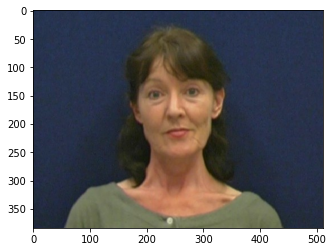

In [ ]:
plt.imshow(img)

In [ ]:
result = detector.detect_faces(img)

In [ ]:
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

In [ ]:
cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,255,0),
              2)

array([[[39, 55, 81],
        [32, 48, 74],
        [36, 51, 80],
        ...,
        [39, 50, 80],
        [40, 51, 83],
        [38, 49, 81]],

       [[36, 52, 78],
        [29, 45, 71],
        [34, 49, 78],
        ...,
        [40, 51, 81],
        [40, 51, 83],
        [38, 49, 81]],

       [[33, 49, 75],
        [28, 44, 70],
        [34, 48, 77],
        ...,
        [40, 51, 81],
        [38, 49, 81],
        [37, 48, 80]],

       ...,

       [[31, 44, 61],
        [29, 42, 59],
        [28, 39, 59],
        ...,
        [35, 42, 61],
        [34, 41, 60],
        [37, 44, 63]],

       [[31, 44, 61],
        [29, 42, 59],
        [27, 40, 59],
        ...,
        [36, 44, 65],
        [34, 42, 63],
        [36, 44, 65]],

       [[29, 42, 59],
        [29, 42, 59],
        [28, 41, 60],
        ...,
        [39, 47, 68],
        [35, 43, 64],
        [35, 43, 64]]], dtype=uint8)

In [ ]:
cv2.circle(img,(keypoints['left_eye']), 2, (0,255,0), 2)
cv2.circle(img,(keypoints['right_eye']), 2, (0,255,0), 2)
cv2.circle(img,(keypoints['nose']), 2, (0,255,0), 2)
cv2.circle(img,(keypoints['mouth_left']), 2, (0,255,0), 2)
cv2.circle(img,(keypoints['mouth_right']), 2, (0,255,0), 2)

array([[[39, 55, 81],
        [32, 48, 74],
        [36, 51, 80],
        ...,
        [39, 50, 80],
        [40, 51, 83],
        [38, 49, 81]],

       [[36, 52, 78],
        [29, 45, 71],
        [34, 49, 78],
        ...,
        [40, 51, 81],
        [40, 51, 83],
        [38, 49, 81]],

       [[33, 49, 75],
        [28, 44, 70],
        [34, 48, 77],
        ...,
        [40, 51, 81],
        [38, 49, 81],
        [37, 48, 80]],

       ...,

       [[31, 44, 61],
        [29, 42, 59],
        [28, 39, 59],
        ...,
        [35, 42, 61],
        [34, 41, 60],
        [37, 44, 63]],

       [[31, 44, 61],
        [29, 42, 59],
        [27, 40, 59],
        ...,
        [36, 44, 65],
        [34, 42, 63],
        [36, 44, 65]],

       [[29, 42, 59],
        [29, 42, 59],
        [28, 41, 60],
        ...,
        [39, 47, 68],
        [35, 43, 64],
        [35, 43, 64]]], dtype=uint8)

In [ ]:
cv2.imwrite("sample.jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

In [ ]:
result

[{'box': [186, 89, 134, 165],
  'confidence': 0.9999996423721313,
  'keypoints': {'left_eye': (217, 150),
   'mouth_left': (231, 217),
   'mouth_right': (282, 210),
   'nose': (250, 181),
   'right_eye': (280, 143)}}]

In [ ]:
sample_img = cv2.imread("/content/drive/MyDrive/sample.jpg")

# As you can see below that MTCNN has extracted a bounding box from the face inside the image and also detected keypoints of left eye, right eye, nose, left cheek and right cheek. 

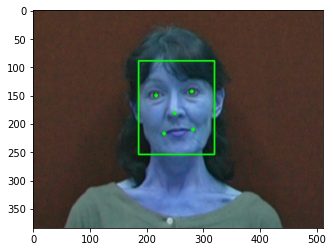

In [ ]:
plt.imshow(sample_img)

# In order to allign all the faces in the frames of a video,we have to first extract the angle of eyes with horizontal becauase in all the frames, face will moving in all the directions and hence we have to allign (rotate) all the faces at 0 degree with the horizontal or at some fix angle with the horizontal and for this we have to determine the angle of the face with the horizontal which will be actually equal to angle of the eyes made with the horizontal. 

In [ ]:
def determining_angle_of_eyes(left_eye_keypoint,right_eye_keypoint):

  del_y = right_eye_keypoint[1] - left_eye_keypoint[1]
  del_x = right_eye_keypoint[0] - left_eye_keypoint[0]

  return np.degrees(np.arctan2(del_y,del_x))

# Since, we are fetching faces from each of the frames in the videos, we have to also rescale each of the fetched faces to the fixed size as we want to convert the fetched faces and their keypoints to the fixed dimensional feature vector and that can only be possible when each fetched face is converted into a fixed size image (rescaling). So, below function does the rescaling of fetched faces. Please exmaine this funcmtion carefully and see what is happening here because such kind of operations are used a lot while fetching features from the images. 

In [ ]:
def determine_scaling_factor(org_img_left_eye_kp,org_img_right_eye_kp,rescaled_img_left_eye_kp,
                             rescaled_img_right_eye_kp):
  
  del_y_org = org_img_right_eye_kp[1] - org_img_left_eye_kp[1]
  del_x_org = org_img_right_eye_kp[0] - org_img_left_eye_kp[0]

  dist_org = np.sqrt((del_y_org**2) + (del_x_org**2))

  del_y_rescaled = rescaled_img_right_eye_kp[1] - rescaled_img_left_eye_kp[1]
  del_x_rescaled = rescaled_img_right_eye_kp[0] - rescaled_img_left_eye_kp[0]

  dist_rescaled = np.sqrt((del_y_rescaled)**2 + (del_x_rescaled)**2)

  scaling_factor = dist_rescaled/dist_org

  return scaling_factor

# The function shown below is the main function responsible for extracting faces as well as rescaling and reallinging all the faces and will be calling the above functions indirectly. 

# To know more about cv2.getRotationMtrix2D and cv2.warpAffine tht what they are doing, you can read following: 

# https://learnopencv.com/tag/cv2-getrotationmatrix2d/

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [ ]:
def crop_faces_and_reallign(rescaled_img_width,eye_loc_percentage,org_img,left_eye_kp,right_eye_kp):

  rescaled_img_left_eye_kp = (eye_loc_percentage[0]*rescaled_img_width, eye_loc_percentage[1]*rescaled_img_width)
  rescaled_img_right_eye_kp = ((1-eye_loc_percentage[0])*rescaled_img_width, eye_loc_percentage[1]*rescaled_img_width)
  #print(rescaled_img_left_eye_kp,rescaled_img_right_eye_kp)

  eyes_center = ((left_eye_kp[0] + right_eye_kp[0])//2, (left_eye_kp[1] + right_eye_kp[1])//2)
  #print(eyes_center)

  scaling_factor = determine_scaling_factor(left_eye_kp,right_eye_kp,rescaled_img_left_eye_kp,
                                            rescaled_img_right_eye_kp)
  #print(scaling_factor)
  
  eyes_angle = determining_angle_of_eyes(left_eye_kp,right_eye_kp)
  #print(eyes_angle)

  rotation_matrix = cv2.getRotationMatrix2D(center=eyes_center,angle=eyes_angle,scale=scaling_factor)
  #print(rotation_matrix)

  #print(rescaled_img_width,rescaled_img_left_eye_kp[1])

  translated_x = rescaled_img_width * 0.5
  translated_y = rescaled_img_left_eye_kp[1]
  #print(rescaled_img_width,rescaled_img_left_kp[1])

  rotation_matrix[0,2] = rotation_matrix[0,2] + (translated_x - eyes_center[0])
  rotation_matrix[1,2] = rotation_matrix[1,2] + (translated_y - eyes_center[1])

  rotated_and_scaled_image = cv2.warpAffine(src=org_img,M=rotation_matrix,dsize=(rescaled_img_width,rescaled_img_width))
  
  #print(rotated_and_scaled_image)

  return rotated_and_scaled_image

# The below function detect single face from single frame of a video. 

In [ ]:
def detect_single_image_face(org_img,eye_loc_percentage,rescaled_img_width):

  rgb_img = cv2.cvtColor(org_img,cv2.COLOR_BGR2RGB)
  result = detector.detect_faces(rgb_img)
  #print(result)

  left_eye_kp = result[0]["keypoints"]["left_eye"]
  right_eye_kp = result[0]["keypoints"]["right_eye"]

  #print(rescaled_img_width,eye_loc_percentage,left_eye_kp,right_eye_kp)

  rotated_scaled_face_img = crop_faces_and_reallign(rescaled_img_width,eye_loc_percentage,org_img,left_eye_kp,right_eye_kp)

  return rotated_scaled_face_img

# The below function extracts faces from the frames of a single video and write the rescaled (warped) and realligned faces to the folders. 

In [ ]:
def extract_single_vid_face_frames_and_save(src_path_to_single_vid_frames,dst_base_path_to_single_person_vids):

  #print(src_path_to_single_vid_frames)

  single_vid_frames = glob(src_path_to_single_vid_frames+"/*.jpg")

  #print(single_vid_frames)

  os.mkdir(os.path.join(dst_base_path_to_single_person_vids,src_path_to_single_vid_frames.split("/")[-1]))

  dst_base_path_to_single_vid = os.path.join(dst_base_path_to_single_person_vids,src_path_to_single_vid_frames.split("/")[-1])

  #print(dst_base_path_to_single_vid)
  f_counter = 0

  for single_img in single_vid_frames:

    org_img = plt.imread(single_img)
    #print(org_img.shape)
    rotated_scaled_face_img = detect_single_image_face(org_img,eye_loc_percentage=(0.375,0.375),rescaled_img_width=224)
    #print(rotated_scaled_face_img.shape)
    print("Extracted face from {}".format(single_img))

    cv2.imwrite(os.path.join(dst_base_path_to_single_vid,single_img.split("/")[-1].split(".")[0]+"_face"+str(f_counter)+".jpg"),rotated_scaled_face_img)
    print("Written the Image of face into {}".format(dst_base_path_to_single_vid))
    f_counter = f_counter + 1

# The function below call the function above over all the frames of all the videos of a single person in parallel so that extractions and reallignment happens fast. 

In [ ]:
def extract_single_person_vids_frames_and_save(src_path_to_single_person_vids,dst_base_path):

  #print(src_path_to_single_person_vids)

  src_base_path_to_single_person_vids = glob(src_path_to_single_person_vids+"/*")
  #print(src_base_path_to_single_person_vids)
  single_person_vids = list(src_base_path_to_single_person_vids)

  #print(single_person_vids)

  os.mkdir(os.path.join(dst_base_path,src_path_to_single_person_vids.split("/")[-1]))

  dst_base_path_to_single_person_vids = os.path.join(dst_base_path,src_path_to_single_person_vids.split("/")[-1])

  #print(dst_base_path_to_single_person_vids)

  dst_base_paths_to_single_person_vids = [dst_base_path_to_single_person_vids]*len(single_person_vids)

  with ThreadPoolExecutor(max_workers=4) as executor:

    executor.map(extract_single_vid_face_frames_and_save,single_person_vids,dst_base_paths_to_single_person_vids)

# Now, the above function is aclled on the frames of videos of different persons in parallel as shown below. 

In [ ]:
src_base_path = "/content/drive/MyDrive/DeepfakeTIMIT_frames"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

os.mkdir(os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_faces"))

dst_base_path = os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_faces")

dst_base_paths = [dst_base_path]*len(persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:

  executor.map(extract_single_person_vids_frames_and_save,persons_vids,dst_base_paths)

Streaming output truncated to the last 5000 lines.
Extracted face from /content/drive/MyDrive/DeepfakeTIMIT_frames/msjs1/sx189-video-mrgg0.avi/sx189-video-mrgg0.avi_frame89.jpg
Written the Image of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/msjs1/sx189-video-mrgg0.avi
Extracted face from /content/drive/MyDrive/DeepfakeTIMIT_frames/mrjo0/sx194-video-mstk0.avi/sx194-video-mstk0.avi_frame12.jpg
Written the Image of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mrjo0/sx194-video-mstk0.avi
Extracted face from /content/drive/MyDrive/DeepfakeTIMIT_frames/mpdf0/sx372-video-mdab0.avi/sx372-video-mdab0.avi_frame91.jpg
Extracted face from /content/drive/MyDrive/DeepfakeTIMIT_frames/mrjo0/sx374-video-mstk0.avi/sx374-video-mstk0.avi_frame51.jpg
Written the Image of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mrjo0/sx374-video-mstk0.avi
Written the Image of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mpdf0/sx372-video-mdab0.avi
Extracted

# Similarly it is done for the real videos as shown below using the above functions. 

In [ ]:
src_base_path = "/content/drive/MyDrive/VidTIMIT_frames"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

os.mkdir(os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_faces"))

dst_base_path = os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_faces")

dst_base_paths = [dst_base_path]*len(persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:

  executor.map(extract_single_person_vids_frames_and_save,persons_vids,dst_base_paths)

Streaming output truncated to the last 5000 lines.
Extracted face from /content/drive/MyDrive/VidTIMIT_frames/mgwt0/sx99.avi/sx99.avi_frame55.jpg
Written the Image of face into /content/drive/MyDrive/VidTIMIT_frames_faces/mgwt0/sx99.avi
Extracted face from /content/drive/MyDrive/VidTIMIT_frames/fadg0/sx19.avi/sx19.avi_frame43.jpg
Written the Image of face into /content/drive/MyDrive/VidTIMIT_frames_faces/fadg0/sx19.avi
Extracted face from /content/drive/MyDrive/VidTIMIT_frames/mgwt0/sx369.avi/sx369.avi_frame80.jpg
Written the Image of face into /content/drive/MyDrive/VidTIMIT_frames_faces/mgwt0/sx369.avi
Extracted face from /content/drive/MyDrive/VidTIMIT_frames/mrcz0/sx191.avi/sx191.avi_frame84.jpg
Written the Image of face into /content/drive/MyDrive/VidTIMIT_frames_faces/mrcz0/sx191.avi
Extracted face from /content/drive/MyDrive/VidTIMIT_frames/mrcz0/sx371.avi/sx371.avi_frame66.jpg
Written the Image of face into /content/drive/MyDrive/VidTIMIT_frames_faces/mrcz0/sx371.avi
Extracted 

In [ ]:
from skimage.metrics import normalized_root_mse, peak_signal_noise_ratio, structural_similarity

# After extracting faces from each individual frames and from all the deepfake and real videos and realligning them, we will extract feature vectors from each image of extracted faces of same size. What kind of features we will be fetching from each same size image of faces. well, there are many features but we will extracting right now only three features which themselves will be in the form of vectors. We will be extracting: 

# 1. Normalized Root MSE
# 2. PSNR (Peak Signal to Noise Ratio)
# 3. Structural Similarity
# 4. Intensity Histogram

# And finally merging (concatenating) them with each other to create a row vector per single face image and then we will labelling them with "real" or "fake" depending upon from where we are fetching that face. 

In [ ]:
def compute_feature_vector_on_image(image_path):

  img = plt.imread(image_path)
  blurred_img = cv2.GaussianBlur(img,(3,3),0.5)

  nrmse = normalized_root_mse(img,blurred_img)
  psnr = peak_signal_noise_ratio(img,blurred_img,data_range=255)
  ssim = structural_similarity(img,blurred_img,multichannel=True,gaussian_weights=True,sigma=1.5,
                               use_sample_covariance=False,data_range=255)
  hist,bins = np.histogram(img.ravel(),32,[0,255],density=True)

  feature_vector = np.concatenate([[nrmse],[psnr],[ssim],hist])

  return feature_vector


# The below function will call the above function on all the extracted faces of a single video of a single person and write the extracted features returned by above function on single face image into compressed array format and will write these compressed arrays into a directory. 

In [ ]:
def extract_single_vid_face_frames_feature_vector_and_save(src_path_to_single_vid_frames,dst_base_path_to_single_person_vids):

  #print(src_path_to_single_vid_frames)

  single_vid_frames = glob(src_path_to_single_vid_frames+"/*.jpg")

  #print(single_vid_frames)

  os.mkdir(os.path.join(dst_base_path_to_single_person_vids,src_path_to_single_vid_frames.split("/")[-1]))

  dst_base_path_to_single_vid = os.path.join(dst_base_path_to_single_person_vids,src_path_to_single_vid_frames.split("/")[-1])

  #print(dst_base_path_to_single_vid)
  f_counter = 0

  for single_img in single_vid_frames:

    feature_vector = compute_feature_vector_on_image(single_img)
    #print(org_img.shape)
    #rotated_scaled_face_img = detect_single_image_face(org_img,eye_loc_percentage=(0.375,0.375),rescaled_img_width=224)
    #print(rotated_scaled_face_img.shape)
    print("Extracted feature vector from {}".format(single_img))

    #cv2.imwrite(os.path.join(dst_base_path_to_single_vid,single_img.split("/")[-1].split(".")[0]+"_face"+str(f_counter)+".jpg"),rotated_scaled_face_img)
    np.savez_compressed(os.path.join(dst_base_path_to_single_vid,single_img.split("/")[-1].split(".")[0]+"_face"+str(f_counter)+".npz"),a=feature_vector)
    print("Written the Feature Vector of face into {}".format(dst_base_path_to_single_vid))
    f_counter = f_counter + 1

# The below function will call the above function over all the videos of a single person in parallel. 

In [ ]:
def extract_single_person_vids_frames_feature_vector_and_save(src_path_to_single_person_vids,dst_base_path):

  #print(src_path_to_single_person_vids)

  src_base_path_to_single_person_vids = glob(src_path_to_single_person_vids+"/*")
  #print(src_base_path_to_single_person_vids)
  single_person_vids = list(src_base_path_to_single_person_vids)

  #print(single_person_vids)

  os.mkdir(os.path.join(dst_base_path,src_path_to_single_person_vids.split("/")[-1]))

  dst_base_path_to_single_person_vids = os.path.join(dst_base_path,src_path_to_single_person_vids.split("/")[-1])

  #print(dst_base_path_to_single_person_vids)

  dst_base_paths_to_single_person_vids = [dst_base_path_to_single_person_vids]*len(single_person_vids)

  with ThreadPoolExecutor(max_workers=4) as executor:

    executor.map(extract_single_vid_face_frames_feature_vector_and_save,single_person_vids,dst_base_paths_to_single_person_vids)

# The below code snippet will call the above function over all the videos of all the persons in parallel. 

In [ ]:
src_base_path = "/content/drive/MyDrive/DeepfakeTIMIT_frames_faces"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

os.mkdir(os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_feature_vectors"))

dst_base_path = os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_feature_vectors")

dst_base_paths = [dst_base_path]*len(persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:

  executor.map(extract_single_person_vids_frames_feature_vector_and_save,persons_vids,dst_base_paths)

Streaming output truncated to the last 5000 lines.
Extracted feature vector from /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mrjo0/sx104-video-mstk0.avi/sx104-video-mstk0_face74.jpg
Written the Feature Vector of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces_feature_vectors/mrjo0/sx104-video-mstk0.avi
Extracted feature vector from /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/msjs1/sa1-video-mrgg0.avi/sa1-video-mrgg0_face79.jpg
Written the Feature Vector of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces_feature_vectors/msjs1/sa1-video-mrgg0.avi
Extracted feature vector from /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mwbt0/sa1-video-mpgl0.avi/sa1-video-mpgl0_face53.jpg
Written the Feature Vector of face into /content/drive/MyDrive/DeepfakeTIMIT_frames_faces_feature_vectors/mwbt0/sa1-video-mpgl0.avi
Extracted feature vector from /content/drive/MyDrive/DeepfakeTIMIT_frames_faces/mrjo0/si734-video-mstk0.avi/si734-video-mstk0_face153.jpg
Written th

# The below code snippet will eb doing the similar things for the real videos. 

In [ ]:
src_base_path = "/content/drive/MyDrive/VidTIMIT_frames_faces"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

os.mkdir(os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_feature_vectors"))

dst_base_path = os.path.join("/".join(src_base_path.split("/")[:-1]),src_base_path.split("/")[-1]+"_feature_vectors")

dst_base_paths = [dst_base_path]*len(persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:

  executor.map(extract_single_person_vids_frames_feature_vector_and_save,persons_vids,dst_base_paths)

Streaming output truncated to the last 5000 lines.
Extracted feature vector from /content/drive/MyDrive/VidTIMIT_frames_faces/fadg0/si649.avi/si649_face97.jpg
Written the Feature Vector of face into /content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors/fadg0/si649.avi
Extracted feature vector from /content/drive/MyDrive/VidTIMIT_frames_faces/mgwt0/sx189.avi/sx189_face81.jpg
Extracted feature vector from /content/drive/MyDrive/VidTIMIT_frames_faces/mcem0/si1398.avi/si1398_face37.jpg
Extracted feature vector from /content/drive/MyDrive/VidTIMIT_frames_faces/mgwt0/sx9.avi/sx9_face43.jpg
Written the Feature Vector of face into /content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors/mgwt0/sx189.avi
Written the Feature Vector of face into /content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors/mcem0/si1398.avi
Written the Feature Vector of face into /content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors/mgwt0/sx9.avi
Extracted feature vector from /content/drive/MyDrive

# The below coding snippets show the whole procedure involved in coverting the feature vectors of each extracted faces of each frame of each video into a dataframe. And then SVM can be applied on the below resulting dataframe after splitting it into traning, cross validation and testing data. We will train the SVM using training data and check it's performance on cross validation data. So, your job finally is to train SVM on the below training data in the form of Dataframe and then determine the performance metrics of the trained SVM. 

In [ ]:
real_faces_folders = os.listdir("/content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors")
fake_faces_folders = os.listdir("/content/drive/MyDrive/DeepfakeTIMIT_frames_faces_feature_vectors")

In [ ]:
common_folders = list(set(real_faces_folders).intersection(set(fake_faces_folders)))

In [ ]:
common_training_folders = common_folders[0:int(0.7*len(common_folders))]

In [ ]:
common_cv_folders = common_folders[int(0.7*len(common_folders)):int(0.9*len(common_folders))]

In [ ]:
common_testing_folders = common_folders[int(0.9*len(common_folders)):]

In [ ]:
f_counter = 0

In [ ]:
def load_npz_and_append(src_path_to_single_frame):

  global f_counter
  f_counter = f_counter + 1

  return np.load(src_path_to_single_frame)['a']

In [ ]:
def load_single_vid_npz_and_append(src_path_to_single_vid_frames):

  single_vid_frames = list(glob(src_path_to_single_vid_frames+"/*.npz"))

  with ThreadPoolExecutor(max_workers=4) as executor:
    return executor.map(load_npz_and_append,single_vid_frames)

In [ ]:
def load_single_person_vids_npz_and_append(src_path_to_single_person_vids):

  src_base_path_to_single_person_vids = list(glob(src_path_to_single_person_vids+"/*"))

  with ThreadPoolExecutor(max_workers=4) as executor:
    return executor.map(load_single_vid_npz_and_append,src_base_path_to_single_person_vids)

In [ ]:
features = list()
src_base_path = "/content/drive/MyDrive/DeepfakeTIMIT_frames_faces_feature_vectors"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:
  features.append(executor.map(load_single_person_vids_npz_and_append,persons_vids))

In [ ]:
complete_data_features = list()

for obj1 in list(features[0]):

  for obj2 in list(obj1):

    complete_data_features.extend(list(obj2))

In [ ]:
fake_training_labels = np.array(['fake']*f_counter)

In [ ]:
f_counter = 0

In [ ]:
features = list()
src_base_path = "/content/drive/MyDrive/VidTIMIT_frames_faces_feature_vectors"
src_path_to_persons_vids = glob(src_base_path+"/*")
persons_vids = list(src_path_to_persons_vids)

with ThreadPoolExecutor(max_workers=4) as executor:
  features.append(executor.map(load_single_person_vids_npz_and_append,persons_vids))

In [ ]:
for obj1 in list(features[0]):

  for obj2 in list(obj1):

    complete_data_features.extend(list(obj2))

In [ ]:
len(complete_data_features)

77331

In [ ]:
real_training_labels = np.array(['real']*f_counter)

In [ ]:
fake_training_labels.shape

(32207,)

In [ ]:
real_training_labels.shape

(45124,)

In [ ]:
complete_data_features = np.asarray(complete_data_features)

In [ ]:
complete_data_features.shape

(77331, 35)

In [ ]:
complete_data_features

array([[1.06818659e-02, 4.69624024e+01, 9.97292025e-01, ...,
        2.68440710e-04, 1.25050020e-05, 2.50100040e-06],
       [1.05327393e-02, 4.70955970e+01, 9.97381278e-01, ...,
        2.21755369e-04, 2.16753368e-05, 2.50100040e-06],
       [1.05032817e-02, 4.70798266e+01, 9.97402876e-01, ...,
        2.24256369e-04, 3.50140056e-05, 4.16833400e-06],
       ...,
       [1.23187853e-02, 4.62157275e+01, 9.95462406e-01, ...,
        1.31719354e-04, 6.50260104e-05, 3.00120048e-05],
       [1.22273714e-02, 4.62898870e+01, 9.95546268e-01, ...,
        1.43390690e-04, 6.33586768e-05, 3.50140056e-05],
       [1.21230318e-02, 4.63126441e+01, 9.95668894e-01, ...,
        1.27551020e-04, 6.83606776e-05, 3.50140056e-05]])

In [ ]:
complete_data_labels = np.concatenate((fake_training_labels,real_training_labels),axis=0)

In [ ]:
complete_data_labels = complete_data_labels.reshape(complete_data_labels.shape[0],1)

In [ ]:
data = np.concatenate((complete_data_features,complete_data_labels),axis=1)

In [ ]:
data.shape

(77331, 36)

In [ ]:
import pandas as pd

In [ ]:
data_df = pd.DataFrame(data=data)

In [ ]:
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.010681865929894334,46.962402443459005,0.9972920249188707,0.0001525610244097639,0.0022383953581432575,0.006169134320394825,0.005409663865546218,0.008858543417366947,0.013956415899693212,0.006972789115646258,0.0035614245698279315,0.006282513005202081,0.008976924102974524,0.0039265706282513,0.004936141123115913,0.005316293183940243,0.004693544084300387,0.005099539815926371,0.00481109110310791,0.004430105375483527,0.004302554355075363,0.004041616646658664,0.004219187675070028,0.003605608910230759,0.0030995731625983727,0.002075830332132853,0.0015247765772975859,0.0012288248632786449,0.001207983193277311,0.001534780578898226,0.001577297585700947,0.0009970654928638121,0.0002684407096171802,1.250500200080032e-05,2.501000400160064e-06,fake
1,0.010532739279943002,47.09559703118743,0.9973812776755883,0.00011587968520741629,0.0017732092837134854,0.006423402694411098,0.005828164599173002,0.008607609710550888,0.014249032946511938,0.006881085767640389,0.0036306189142323595,0.006950280112044818,0.00808656796051754,0.00402077497665733,0.005276277177537682,0.005311291183139923,0.004703548085901027,0.005011171135120715,0.0047744097639055615,0.004288382019474456,0.004164165666266507,0.004057456315859677,0.004110810991063091,0.00376233826864079,0.0030512204881952784,0.002090836334533814,0.0014389088968920901,0.0012279911964785913,0.00118047218887555,0.001497265572895825,0.0016581632653061224,0.0010729291716686674,0.00022175536881419237,2.167533680138722e-05,2.501000400160064e-06,fake
2,0.01050328171675024,47.079826642089,0.997402875873204,0.0001325530212084834,0.001932439642523676,0.006301687341603308,0.005811491263171935,0.008174936641323195,0.01448329331732693,0.006660997732426304,0.003446378551420568,0.0071678671468587436,0.007940676270508203,0.004123315993063892,0.005279611844737895,0.005133720154728558,0.004781079098305989,0.004981992797118847,0.004726890756302521,0.004393424036281179,0.004285881019074296,0.004142490329465119,0.00416499933306656,0.0037856809390422836,0.003097905828998266,0.0020491529945311456,0.0013938908896892089,0.001290516206482593,0.0012513338668800854,0.0015522875816993463,0.0016981792717086835,0.0010420835000666934,0.0002242563692143524,3.5014005602240894e-05,4.168334000266773e-06,fake
3,0.010581042484707889,47.08363351987753,0.99736223671337,0.00014422435640923037,0.001962451647325597,0.006286681339202348,0.005782312925170068,0.008532579698546086,0.01447579031612645,0.006816059757236228,0.003623949579831933,0.006245831665999733,0.009300386821395225,0.0041016406562625046,0.005375483526744031,0.0049453114579165,0.00467937174869948,0.004835267440309457,0.004609343737494998,0.004270041349873283,0.004322562358276644,0.004108309990662932,0.004151660664265706,0.0037131519274376415,0.002966186474589836,0.0020191409897292252,0.001344704548486061,0.0012096505268774176,0.0012146525276777378,0.0014964319060957717,0.0016798386021075098,0.001034580498866213,0.0002167533680138722,2.2509003601440575e-05,3.3346672002134185e-06,fake
4,0.010621203972484696,47.075864689636475,0.9973027927288447,0.0001725690276110444,0.0020891690009337068,0.006235827664399092,0.005762304921968787,0.009169501133786848,0.01384637188208617,0.006881085767640389,0.0038948912898492728,0.006770208083233293,0.008766006402561024,0.003959917300253435,0.005377150860344138,0.004935307456315859,0.004625183406696012,0.004896958783513405,0.004540149393090569,0.004358410030678939,0.004263372015472856,0.004146658663465387,0.0040374483126583965,0.003638955582232893,0.002942010137388289,0.0019816259837268243,0.0013513738828864878,0.001205482192877151,0.0011954781912765105,0.0015564559156996131,0.0016348205949046285,0.0010195744964652527,0.0002150860344137655,1.7507002801120447e-05,3.3346672002134185e-06,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77326,0.012315449149